<a href="https://colab.research.google.com/github/adile04/machine-learning-models/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!/bin/bash
!curl -L -o car-price-prediction.zip https://www.kaggle.com/api/v1/datasets/download/hellbuoy/car-price-prediction

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18523  100 18523    0     0  21404      0 --:--:-- --:--:-- --:--:-- 21404


In [2]:
!curl -L -o car-price-prediction.zip https://www.kaggle.com/api/v1/datasets/download/hellbuoy/car-price-prediction

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18523  100 18523    0     0  37581      0 --:--:-- --:--:-- --:--:--  583k


In [3]:
!unzip /content/car-price-prediction.zip

Archive:  /content/car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.shape

(205, 26)

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.dtypes

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [13]:
df.select_dtypes(include=['object']).nunique()

,0
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
enginetype,7
cylindernumber,7
fuelsystem,8


In [14]:
df=df.drop(['car_ID'],axis=1)

In [15]:
df['hecm']=df['carwidth']*df['carheight']*df['carlength']

In [16]:
df=df.drop(['carwidth','carheight','carlength'],axis=1)

In [17]:
df['hecm']

,hecm
0,528019.904
1,528019.904
2,587592.640
3,634816.956
4,636734.832
...,...
200,721961.760
201,720913.920
202,721961.760
203,721961.760


In [18]:
df['doornumber']=df['doornumber'].map({'two':2,'four':4})

In [19]:
!pip install category_encoders
from category_encoders import TargetEncoder
encoder=TargetEncoder()
df_encoded=encoder.fit_transform(df['CarName'],df['price'])
df2=df.copy()
df2['CarName']=df_encoded
df2.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hecm
0,3,13305.111875,gas,std,2,convertible,rwd,front,88.6,2548,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,3,13696.087841,gas,std,2,convertible,rwd,front,88.6,2548,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,1,13696.087841,gas,std,2,hatchback,rwd,front,94.5,2823,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
3,2,13364.311231,gas,std,4,sedan,fwd,front,99.8,2337,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
4,2,13887.136759,gas,std,4,sedan,4wd,front,99.4,2824,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832


In [20]:
df2['doornumber'].value_counts()

,count
doornumber,
4,115
2,90


In [21]:
X=df2.drop('price',axis=1)
y=df2['price']

In [22]:
df2.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'hecm'],
      dtype='object')

In [23]:
df2['aspiration'].value_counts()

,count
aspiration,
std,168
turbo,37


In [24]:
df2['carbody'].value_counts()

,count
carbody,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


In [25]:
df2['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


In [26]:
df2['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


In [27]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [28]:
df2.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'hecm'],
      dtype='object')

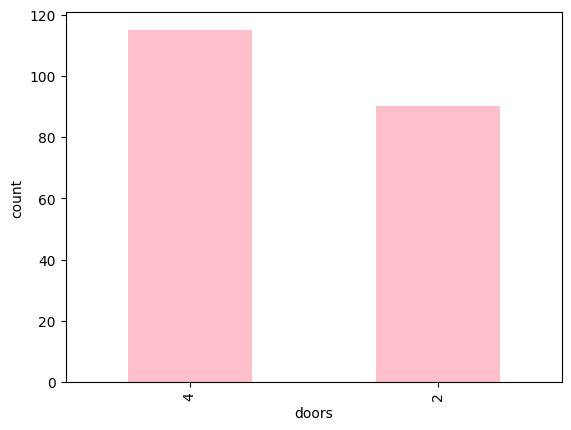

In [29]:
df2['doornumber'].value_counts().plot(kind='bar',color='pink')
plt.xlabel("doors")
plt.ylabel("count")
plt.show()

In [30]:
df2.shape

(205, 23)

In [31]:
df2.select_dtypes(include=['object']).nunique()

,0
fueltype,2
aspiration,2
carbody,5
drivewheel,3
enginelocation,2
enginetype,7
cylindernumber,7
fuelsystem,8


In [32]:
X_num=df2.select_dtypes(include=['number'])
X_cat=df2.select_dtypes(include=['object'])

In [33]:
corr_matrix=X_num.corr()
price_corr=corr_matrix['price'].sort_values(ascending=False)
print(price_corr)

price               1.000000
CarName             0.974534
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
hecm                0.624339
wheelbase           0.577816
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [34]:
price_corr.abs().sort_values(ascending=False)

,price
price,1.000000
CarName,0.974534
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
highwaympg,0.697599
citympg,0.685751
hecm,0.624339
wheelbase,0.577816
boreratio,0.553173


In [35]:
df2=df2.drop(['stroke','compressionratio','symboling'],axis=1)

In [61]:
X_num = df2.select_dtypes(include=['int64', 'float64']).drop(columns=['price'], errors='ignore').columns.tolist()
X_cat = df2.select_dtypes(include=['object', 'category']).columns.tolist()

In [62]:
X_num

['CarName',
 'doornumber',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'hecm']

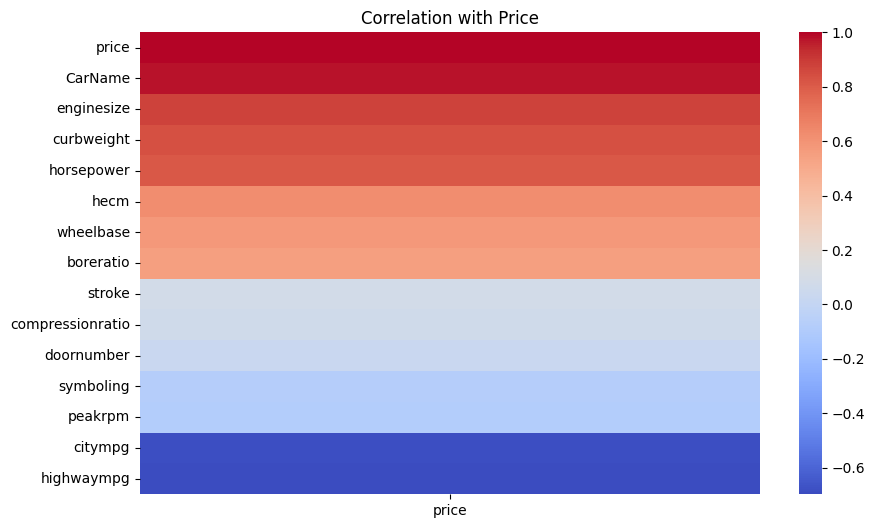

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['price']].sort_values(by='price',ascending=False),cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

In [64]:
price_corr.abs().sort_values(ascending=False)

,price
price,1.000000
CarName,0.974534
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
highwaympg,0.697599
citympg,0.685751
hecm,0.624339
wheelbase,0.577816
boreratio,0.553173


In [65]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

outliers = (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))
print(y[outliers])


15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
Name: price, dtype: float64


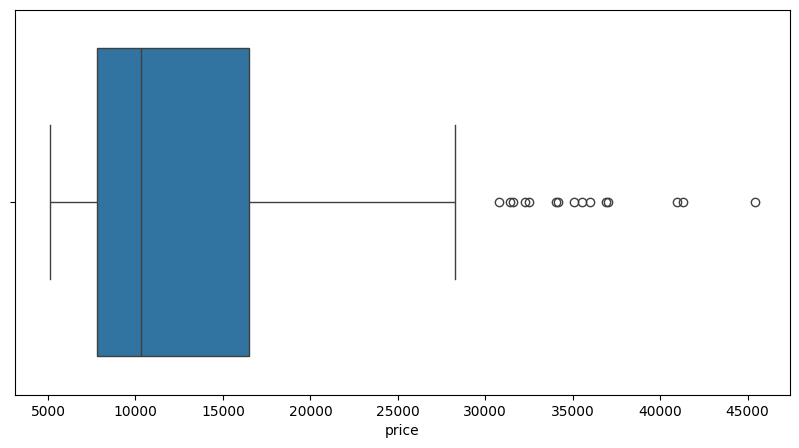

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df2['price'])
plt.show()

In [67]:
price_corr.abs().sort_values(ascending=False)

,price
price,1.000000
CarName,0.974534
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
highwaympg,0.697599
citympg,0.685751
hecm,0.624339
wheelbase,0.577816
boreratio,0.553173


In [68]:
from scipy.stats import zscore
df['price_zscore']=zscore(df['price'])
outliers=df[df['price_zscore'].abs()>2.8]
outliers

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hecm,price_zscore
16,0,bmw x5,gas,std,2,sedan,rwd,front,103.5,3380,...,3.62,3.39,8.0,182,5400,16,22,41315.0,706639.374,3.518268
17,0,bmw x3,gas,std,4,sedan,rwd,front,110.0,3505,...,3.62,3.39,8.0,182,5400,15,20,36880.0,786358.990,2.961761
49,0,jaguar xk,gas,std,2,sedan,rwd,front,102.0,3950,...,3.54,2.76,11.5,262,5000,13,17,36000.0,646926.156,2.851338
73,0,buick century special,gas,std,4,sedan,rwd,front,120.9,3900,...,3.80,3.35,8.0,184,4500,14,16,40960.0,846007.659,3.473723
74,1,buick regal sport coupe (turbo),gas,std,2,hardtop,rwd,front,112.0,3715,...,3.80,3.35,8.0,184,4500,14,16,45400.0,794568.960,4.030858
128,3,porsche boxter,gas,std,2,convertible,rwd,rear,89.5,2800,...,3.74,2.90,9.5,207,5900,17,25,37028.0,566490.600,2.980332


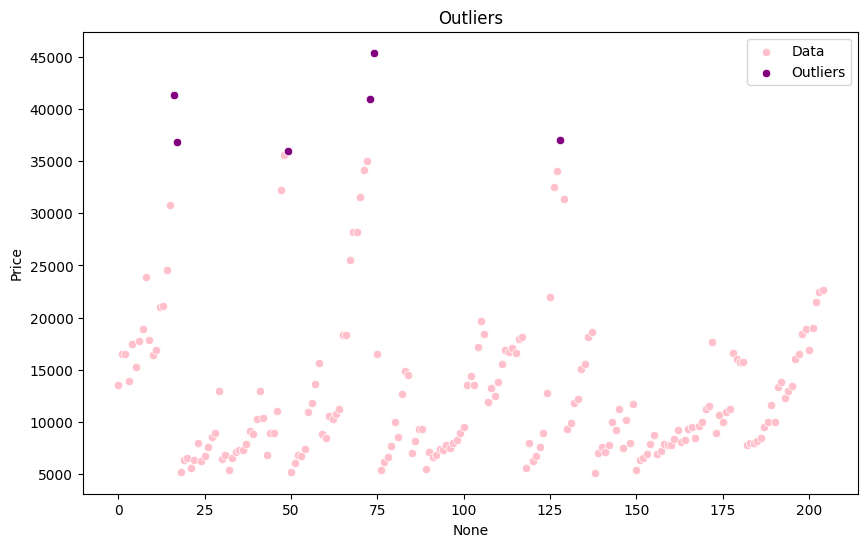

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['price'], label='Data', color='pink')
sns.scatterplot(x=outliers.index, y=outliers['price'], label='Outliers', color='purple')
plt.title('Outliers')
plt.ylabel('Price')
plt.legend()
plt.show()

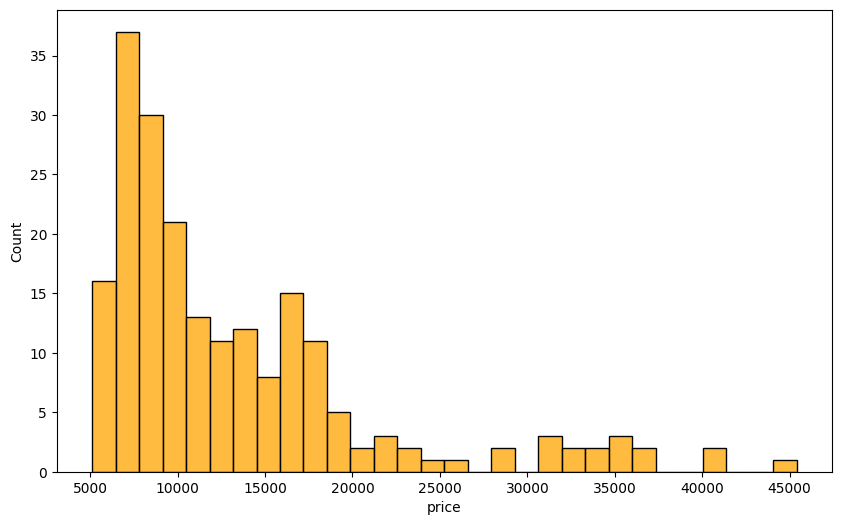

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(df2['price'],bins=30,color='orange')
plt.show()

In [71]:
df['CarName'].dtype

dtype('O')

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
num_pipeline=Pipeline([
    ('scaler',StandardScaler())
])

In [75]:
cat_pipeline=Pipeline([
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [76]:
preprocessor=ColumnTransformer([
    ('num',num_pipeline,X_num),
    ('cat',cat_pipeline,X_cat)
])

In [77]:
model=Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [78]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CarName', 'doornumber',
                                                   'wheelbase', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg',
                                                   'hecm']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem'])])),
                ('regressor', LinearRegression())])

In [80]:
y_pred=model.predict(X_test)

In [81]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R2-score:',r2_score(y_test,y_pred))

MSE: 3033441.2658658614
MAE: 1418.5623699696416
R2-score: 0.961574781318904


In [85]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
print("Cross-Validation R^2 Scores:", scores)
print('Mean of cross-scores:',scores.mean())

Cross-Validation R^2 Scores: [0.95511912 0.9540748  0.96547572 0.92500026 0.924026  ]
Mean of cross-scores: 0.9447391817213372
